# 1. Introduction: Business Goal & Problem Definition

The goal of this project is to study and predict the right group of new customers for an automotive company, so the company can adopt the specific proven marketing strategy to each of them and be more succesful in the business. For that we´ll use the Customer Segmentation Classification Dataset available in Kaggle, containing 10,695 observations, each with the following attributes:

* ID	Unique ID
* Gender	Gender of the customer
* Ever_Married	Marital status of the customer
* Age	Age of the customer
* Graduated	Is the customer a graduate?
* Profession	Profession of the customer
* Work_Experience	Work Experience in years
* Spending_Score	Spending score of the customer
* Family_Size	Number of family members for the customer (including the customer)
* Var_1	Anonymised Category for the customer
* Segmentation	(target) Customer Segment of the customer

# 2. Importing Basic Libraries

In [1]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Collection

In [2]:
auto_train_ds = pd.read_csv("Train.csv")
auto_test_ds = pd.read_csv("Test.csv")
auto_ds = pd.concat([auto_train_ds, auto_test_ds])

auto_ds

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


# 4. Data Preliminary Exploration

In [3]:
auto_ds.sample(n=10, random_state=0)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5475,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1167,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
3156,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
124,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
1158,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D
1509,464634,Female,No,32,Yes,Engineer,NaN,Low,9.0,Cat_4,D
3380,467670,Male,No,25,No,Engineer,NaN,Low,3.0,Cat_6,A
1495,462073,Female,No,36,Yes,Artist,6.0,Low,1.0,Cat_6,C
7372,463611,Male,No,62,Yes,Artist,0.0,Low,NaN,Cat_6,A
5476,460962,Male,Yes,55,Yes,Executive,9.0,High,4.0,Cat_6,C


In [4]:
auto_ds.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [5]:
auto_ds.duplicated().sum()

38

In [6]:
pd.options.display.float_format="{:,.2f}".format
auto_ds.describe(include="all")

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,"10,695.00",10695,10505,"10,695.00",10593,10533,"9,597.00",10695,"10,247.00",10587,10695
unique,nan,2,2,nan,2,9,nan,3,nan,7,4
top,nan,Male,Yes,nan,Yes,Artist,nan,Low,nan,Cat_6,D
freq,nan,5841,6163,nan,6570,3318,nan,6494,nan,6910,3027
mean,"463,468.09",NaN,NaN,43.51,NaN,NaN,2.62,NaN,2.84,NaN,NaN
std,"2,600.97",NaN,NaN,16.77,NaN,NaN,3.39,NaN,1.54,NaN,NaN
min,"458,982.00",NaN,NaN,18.00,NaN,NaN,0.00,NaN,1.00,NaN,NaN
25%,"461,220.50",NaN,NaN,30.00,NaN,NaN,0.00,NaN,2.00,NaN,NaN
50%,"463,451.00",NaN,NaN,41.00,NaN,NaN,1.00,NaN,3.00,NaN,NaN
75%,"465,733.50",NaN,NaN,53.00,NaN,NaN,4.00,NaN,4.00,NaN,NaN


# 5. Data Cleaning

We´ll perform the following:

1. Create a calculated column (Work_Experience_to_Age_Ratio) that could potentialy be a relevant feature to the model (to be tested later)
2. Remove column ID as it´s not important to the model
3. Remove duplicated rows (38 in total)
4. Treating missing values:
    *   4.1 Ever_Married: consider missing values as No
    *   4.2 Graduated: consider missing values as No
    *   4.3 Profession: delete (it´s not representative the amount of blanks)
    *   4.4 Family_Size: mean
    *   4.5 Var_1: delete (it´s not representative the amount of blanks)
    *   4.6 Work_Experience: estimate based on Age
5. Convert categorical variables (Gender, Ever_Married, Graduated, Profession, Spending_Score, Var_1, Segmentation) to dummies
6. Convert all numerical variables (Age, Work_Experience, Family_Size, Work_Experience_to_Age_Ratio) to categorical ranges (to be used in next step when analyzing correlations)

Obs:

* the entire dataset will be taken

In [7]:
#1.
auto_ds["Work_Experience_to_Age_Ratio"] = auto_ds["Work_Experience"] / auto_ds["Age"]

#2.
auto_ds.drop(["ID"], axis=1, inplace=True)

#3.
auto_ds.drop_duplicates(inplace=True)

#4.
auto_ds["Ever_Married"].fillna("No", inplace=True)
auto_ds["Graduated"].fillna("No", inplace=True)
auto_ds.dropna(subset=["Profession"], inplace=True)
auto_ds["Family_Size"].fillna(auto_ds["Family_Size"].mean(), inplace=True)
auto_ds.dropna(subset=["Var_1"], inplace=True)
auto_ds["Work_Experience"].replace(0, np.nan, inplace=True)
auto_ds["Work_Experience"].fillna(auto_ds["Work_Experience"].sum() / auto_ds["Age"].sum() * auto_ds["Age"], inplace=True)
auto_ds["Work_Experience_to_Age_Ratio"].replace(0, np.nan, inplace=True)
auto_ds["Work_Experience_to_Age_Ratio"].fillna(auto_ds["Work_Experience"] / auto_ds["Age"], inplace=True)

#5.
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Gender"], prefix="Gender")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Ever_Married"], prefix="Ever_Married")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Graduated"], prefix="Graduated")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Profession"], prefix="Profession")], axis=1)
auto_ds["Spending_Score_Level"] = auto_ds["Spending_Score"].apply(lambda x: ["Low", "Average", "High"].index(x))+1 #Label encoding
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Var_1"], prefix="Var_1")], axis=1)
auto_ds["Segmentation_Level"] = auto_ds["Segmentation"].apply(lambda x: ["A", "B", "C", "D"].index(x))+1 #Label encoding

#6.
auto_ds["Age_Range"] = np.where(auto_ds.Age>=60, "60+", np.where(auto_ds.Age>=50, "50-60", np.where(auto_ds.Age>=40, "40-50", np.where(auto_ds.Age>=30, "30-40", np.where(auto_ds.Age>=18, "18-30", "18-")))))
auto_ds["Work_Experience_Range"] = np.where(auto_ds.Work_Experience>=10, "10+", np.where(auto_ds.Work_Experience>=5, "5-10", "0-5"))
auto_ds["Family_Size_Range"] = np.where(auto_ds.Family_Size>=6, "6+", np.where(auto_ds.Family_Size>=3, "3-6", "0-3"))
auto_ds["Work_Experience_to_Age_Ratio_Range"] = np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.5, "0.5+", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.4, "0.4-0.5", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.3, "0.3-0.4", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.2, "0.2-0.3", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.1, "0.1-0.2", "0+")))))

auto_ds

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,...,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_Level,Age_Range,Work_Experience_Range,Family_Size_Range,Work_Experience_to_Age_Ratio_Range
0,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D,...,0,1,0,0,0,4,18-30,0-5,3-6,0+
1,Female,Yes,38,Yes,Engineer,2.12,Average,3.00,Cat_4,A,...,0,1,0,0,0,1,30-40,0-5,3-6,0+
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B,...,0,0,0,1,0,2,60+,0-5,0-3,0+
3,Male,Yes,67,Yes,Lawyer,3.75,High,2.00,Cat_6,B,...,0,0,0,1,0,2,60+,0-5,0-3,0+
4,Female,Yes,40,Yes,Entertainment,2.24,High,6.00,Cat_6,A,...,0,0,0,1,0,1,40-50,0-5,6+,0+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,Female,No,35,Yes,Entertainment,1.00,Low,2.00,Cat_6,D,...,0,0,0,1,0,4,30-40,0-5,0-3,0+
2622,Male,No,29,No,Healthcare,9.00,Low,4.00,Cat_6,B,...,0,0,0,1,0,2,18-30,5-10,3-6,0.3-0.4
2623,Female,No,35,Yes,Doctor,1.00,Low,1.00,Cat_6,A,...,0,0,0,1,0,1,30-40,0-5,0-3,0+
2624,Female,No,53,Yes,Entertainment,2.96,Low,2.00,Cat_6,C,...,0,0,0,1,0,3,50-60,0-5,0-3,0+


# 6.	Data Exploration

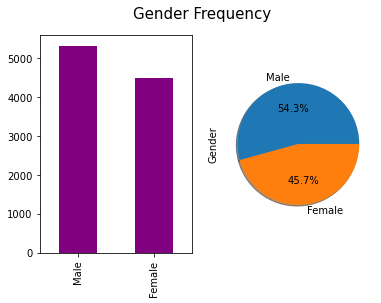

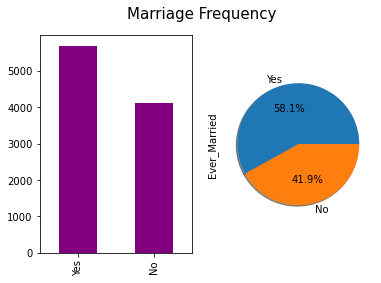

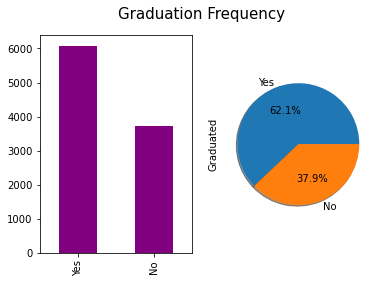

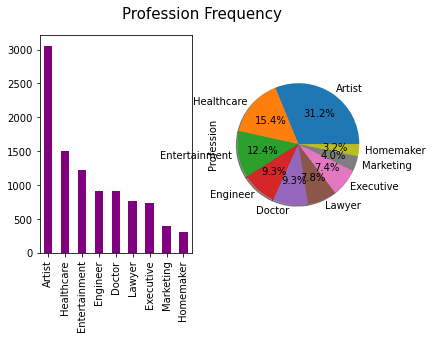

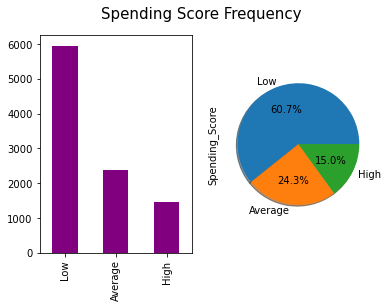

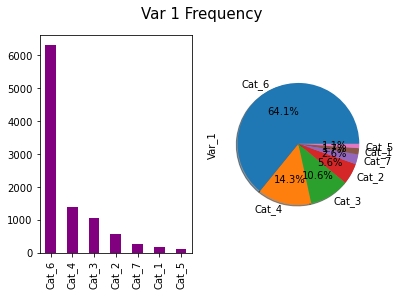

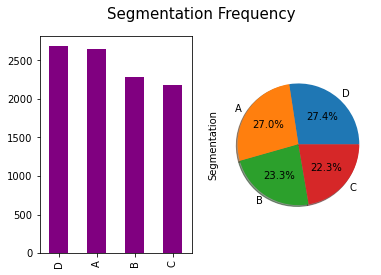

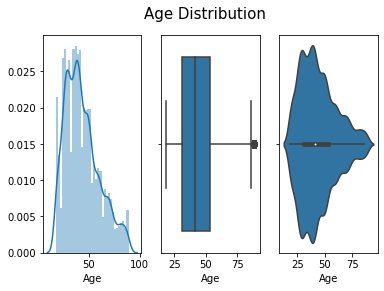

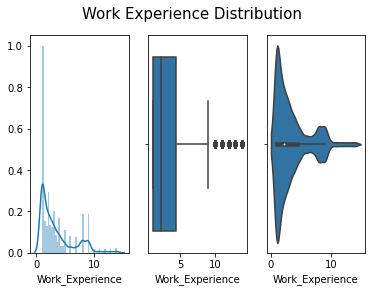

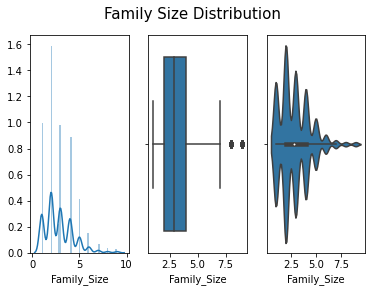

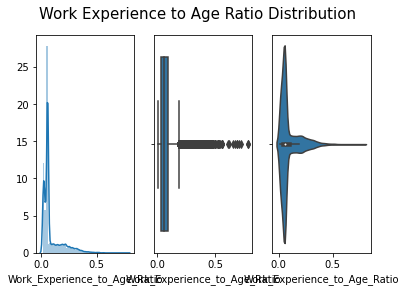

In [8]:
#Plotting Categorical Variables
fig, ax = plt.subplots(1, 2)
auto_ds["Gender"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Ever_Married"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Ever_Married"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Marriage Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Graduated"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Graduated"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Graduation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Profession"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Profession"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Profession Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Spending_Score"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Spending_Score"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Spending Score Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Var_1"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Var_1"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Var 1 Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Segmentation"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Segmentation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)


#Plotting Numerical Variables
fig, ax = plt.subplots(1,3)
fig.suptitle("Age Distribution", fontsize=15)
sns.distplot(auto_ds["Age"], ax=ax[0])
sns.boxplot(auto_ds["Age"], ax=ax[1])
sns.violinplot(auto_ds["Age"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Work Experience Distribution", fontsize=15)
sns.distplot(auto_ds["Work_Experience"], ax=ax[0])
sns.boxplot(auto_ds["Work_Experience"], ax=ax[1])
sns.violinplot(auto_ds["Work_Experience"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Family Size Distribution", fontsize=15)
sns.distplot(auto_ds["Family_Size"], ax=ax[0])
sns.boxplot(auto_ds["Family_Size"], ax=ax[1])
sns.violinplot(auto_ds["Family_Size"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Work Experience to Age Ratio Distribution", fontsize=15)
sns.distplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[0])
sns.boxplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[1])
sns.violinplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[2])

# 7. Correlations Analysis & Features Selection

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 <a list of 28 Text major ticklabel objects>)

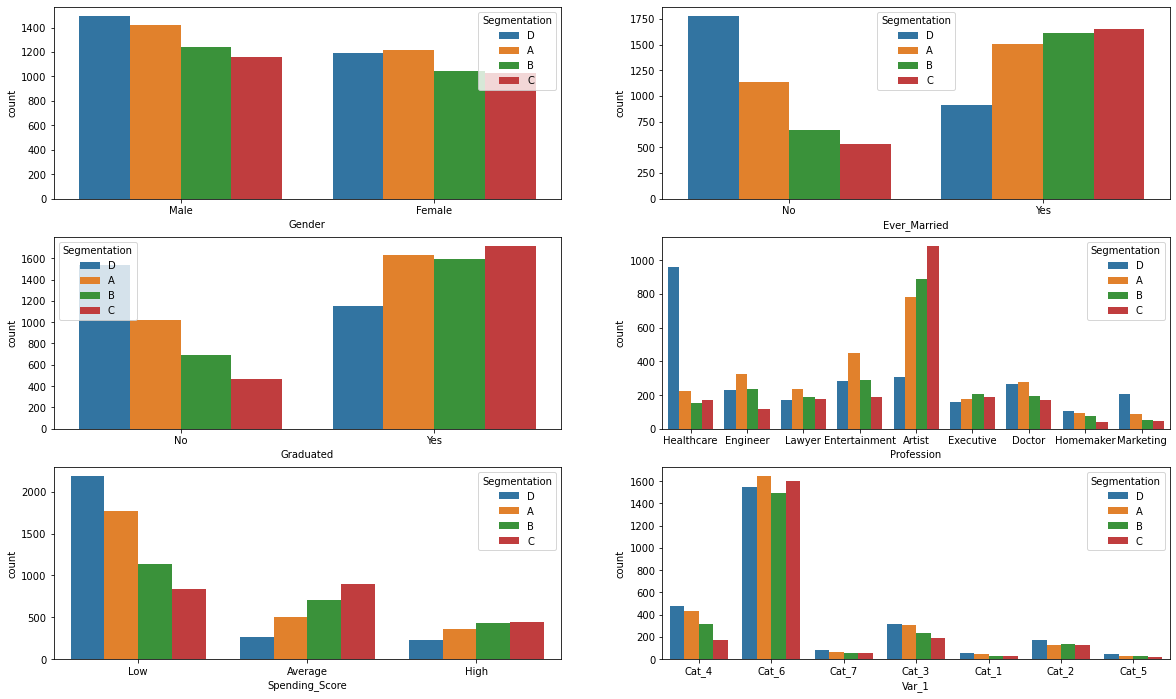

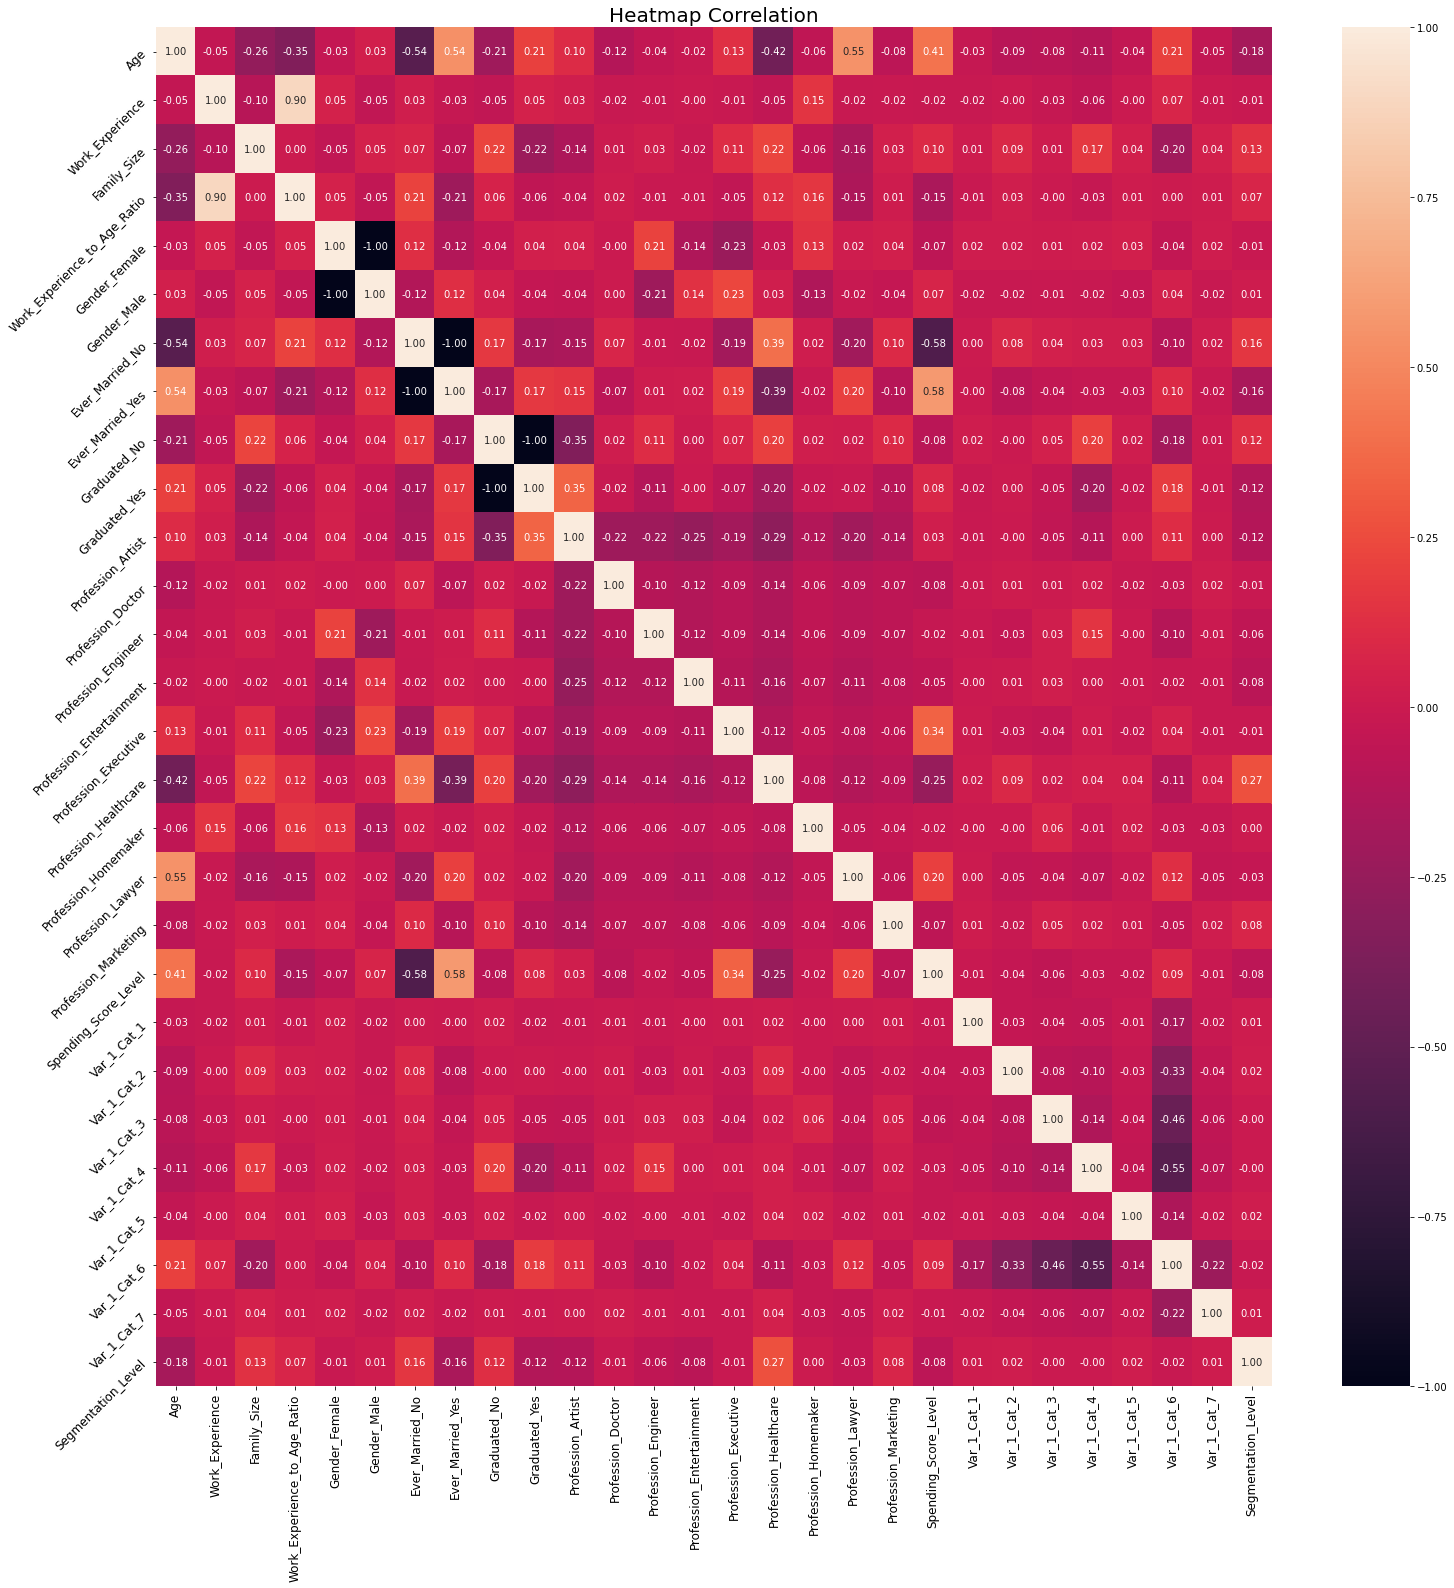

In [9]:
#Plotting Bar Charts, also considering all numerical to categorical variables created at the step before
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x="Gender", hue = "Segmentation", data = auto_ds, ax=axarr[0][0])
sns.countplot(x="Ever_Married", hue = "Segmentation", data = auto_ds, ax=axarr[0][1])
sns.countplot(x="Graduated", hue = "Segmentation", data = auto_ds, ax=axarr[1][0])
sns.countplot(x="Profession", hue = "Segmentation", data = auto_ds, ax=axarr[1][1])
sns.countplot(x="Spending_Score", hue = "Segmentation", data = auto_ds, ax=axarr[2][0])
sns.countplot(x="Var_1", hue = "Segmentation", data = auto_ds, ax=axarr[2][1])

#Plotting a Heatmap
fig, ax = plt.subplots(1, figsize=(25,25))
sns.heatmap(auto_ds.corr(), annot=True, fmt=",.2f")
plt.title("Heatmap Correlation", fontsize=20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

#Plotting a Pairplot
# sns.pairplot(auto_ds[["Age", "Work_Experience", "Family_Size", "Work_Experience_to_Age_Ratio", "Gender_Female", "Gender_Male", "Ever_Married_No", "Ever_Married_Yes", "Graduated_No", "Graduated_Yes", "Profession_Artist", "Profession_Doctor", "Profession_Engineer", "Profession_Entertainment", "Profession_Executive", "Profession_Healthcare", "Profession_Homemaker", "Profession_Lawyer", "Profession_Marketing", "Spending_Score_Level", "Var_1_Cat_1", "Var_1_Cat_2", "Var_1_Cat_3", "Var_1_Cat_4", "Var_1_Cat_5", "Var_1_Cat_6", "Var_1_Cat_7", "Segmentation_Level"]])

Feature:Age, Score:0.2081
Feature:Work_Experience, Score:0.1119
Feature:Family_Size, Score:0.1215
Feature:Work_Experience_to_Age_Ratio, Score:0.1503
Feature:Gender_Female, Score:0.0225
Feature:Gender_Male, Score:0.0214
Feature:Ever_Married_No, Score:0.0163
Feature:Ever_Married_Yes, Score:0.0152
Feature:Graduated_No, Score:0.0214
Feature:Graduated_Yes, Score:0.0214
Feature:Profession_Artist, Score:0.0187
Feature:Profession_Doctor, Score:0.0141
Feature:Profession_Engineer, Score:0.0139
Feature:Profession_Entertainment, Score:0.0164
Feature:Profession_Executive, Score:0.0104
Feature:Profession_Healthcare, Score:0.0658
Feature:Profession_Homemaker, Score:0.0078
Feature:Profession_Lawyer, Score:0.0055
Feature:Profession_Marketing, Score:0.0111
Feature:Spending_Score_Level, Score:0.0265
Feature:Var_1_Cat_1, Score:0.0065
Feature:Var_1_Cat_2, Score:0.0128
Feature:Var_1_Cat_3, Score:0.0192
Feature:Var_1_Cat_4, Score:0.0214
Feature:Var_1_Cat_5, Score:0.0049
Feature:Var_1_Cat_6, Score:0.0265
Feat

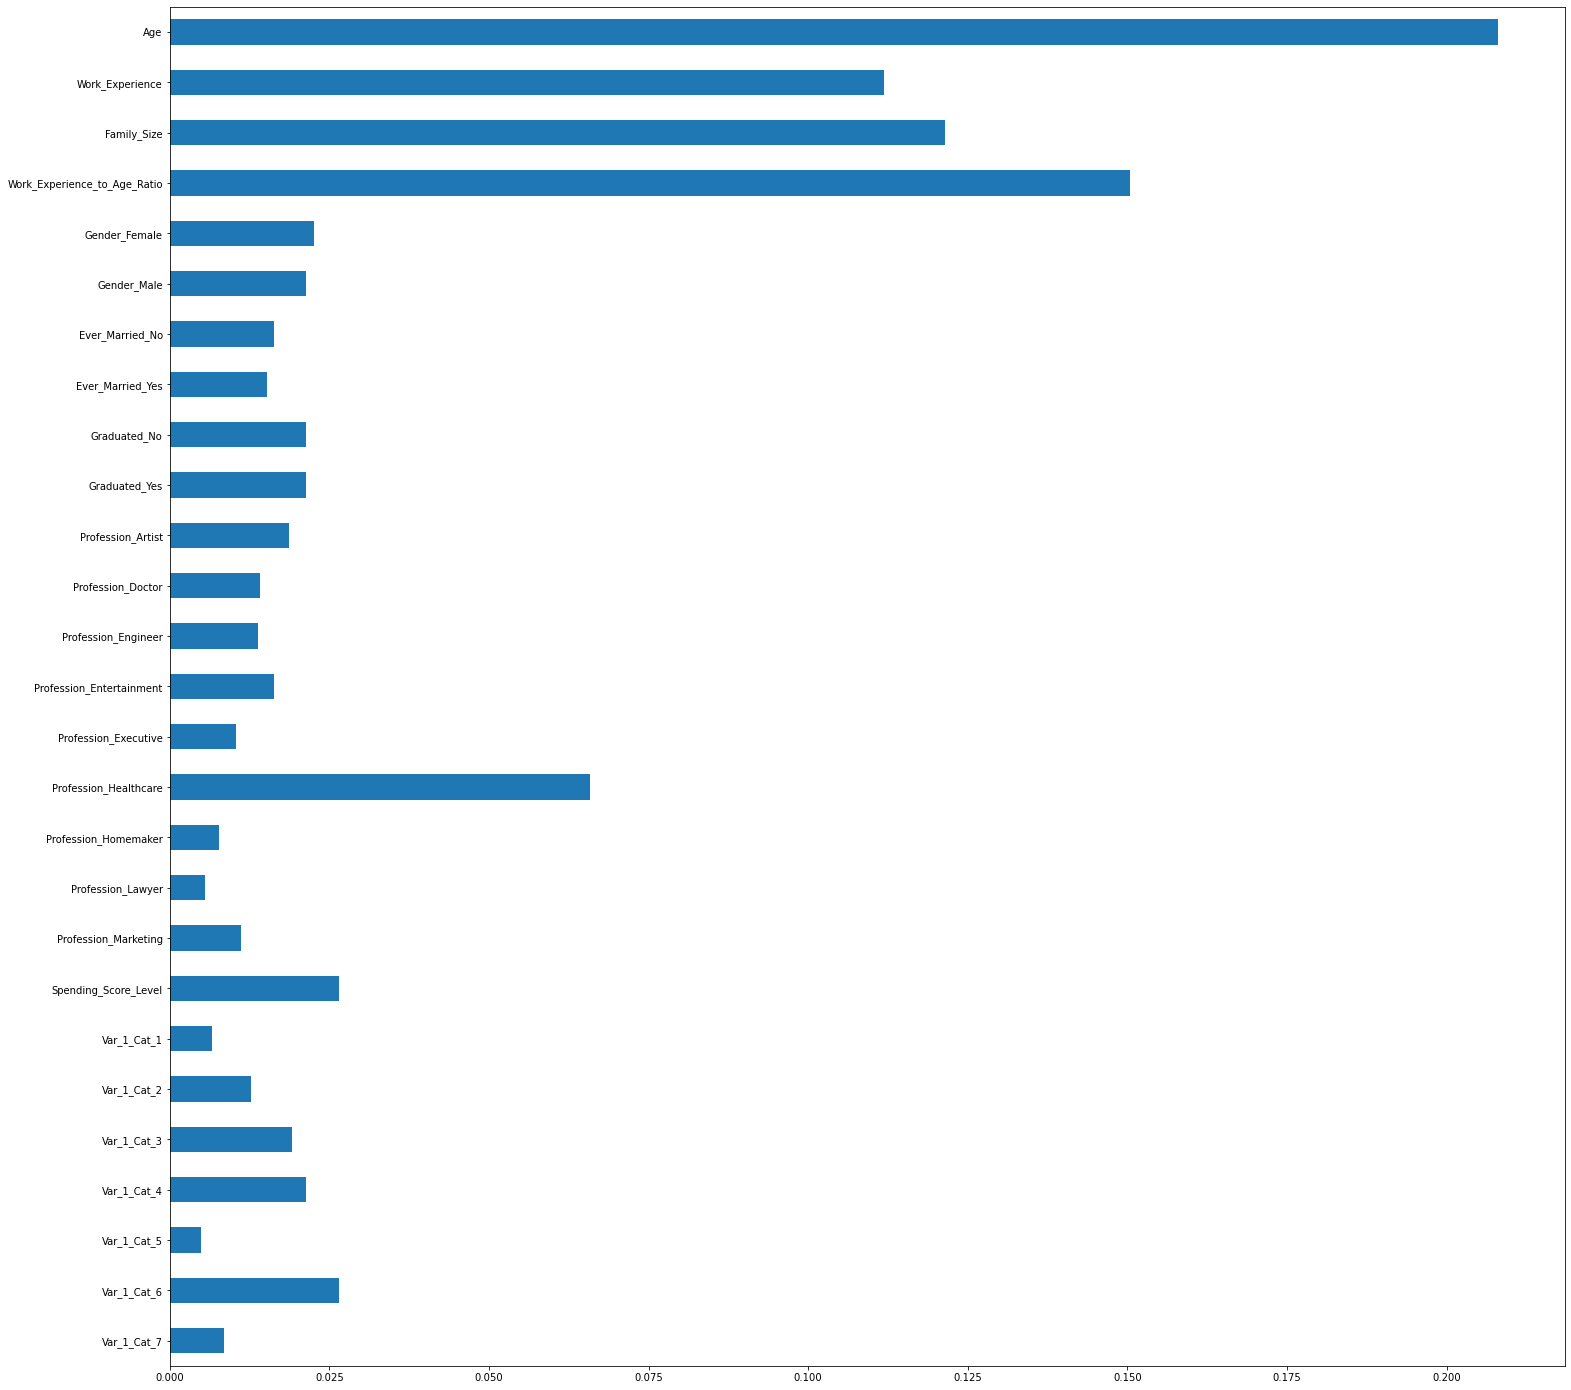

In [10]:
#Plotting a Feature Importance
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
#Defining Xs and y
X = auto_ds[["Age", "Work_Experience", "Family_Size", "Work_Experience_to_Age_Ratio", "Gender_Female", "Gender_Male", "Ever_Married_No", "Ever_Married_Yes", "Graduated_No", "Graduated_Yes", "Profession_Artist", "Profession_Doctor", "Profession_Engineer", "Profession_Entertainment", "Profession_Executive", "Profession_Healthcare", "Profession_Homemaker", "Profession_Lawyer", "Profession_Marketing", "Spending_Score_Level", "Var_1_Cat_1", "Var_1_Cat_2", "Var_1_Cat_3", "Var_1_Cat_4", "Var_1_Cat_5", "Var_1_Cat_6", "Var_1_Cat_7"]]
y = auto_ds["Segmentation_Level"]
#Defining the model
model = RandomForestRegressor().fit(X, y)
#Getting importance
importance = model.feature_importances_
#Summarizing feature importance
for i,v in enumerate(importance):
    print("Feature:{0:}, Score:{1:,.4f}".format(X.columns[i], v))
#Plotting feature importance
pd.Series(model.feature_importances_[::-1], index=X.columns[::-1]).plot(kind="barh", figsize=(25,25))

In [11]:
#Alternatively using Profile Report to see variables statistics and correlations
from pandas_profiling import ProfileReport
profile = ProfileReport(auto_ds, title="Automobile Customer Segmentation Classification")
profile.to_file(output_file="Automobile_Customer_Segmentation_Classification.html")

In [12]:
#Selecting the columns to keep in the dataset
#Why features selection: make the model easier to interpret, reduce training time, avoid curse of dimensionality, reduce overfitting
auto_ds = auto_ds[["Age", "Work_Experience_to_Age_Ratio", "Family_Size", "Work_Experience", "Profession_Healthcare", "Spending_Score_Level", "Segmentation_Level"]]

# 8. Data Modelling

In [13]:
#Defining Xs and y
X = auto_ds[["Age", "Work_Experience_to_Age_Ratio", "Family_Size", "Work_Experience", "Profession_Healthcare", "Spending_Score_Level"]]
y = auto_ds["Segmentation_Level"]

#Scaling all features
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

#Setting train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 9. Machine Learning Algorithms Implementation & Assessment

# 9.1 Logistic Regression

Testing degrees:
Train: Degree:1, Accuracy:0.409, Precision:0.397, Recall:0.409, F1:0.381
Test : Degree:1, Accuracy:0.400, Precision:0.376, Recall:0.400, F1:0.369
Train: Degree:2, Accuracy:0.431, Precision:0.426, Recall:0.431, F1:0.400
Test : Degree:2, Accuracy:0.422, Precision:0.425, Recall:0.422, F1:0.394
Train: Degree:3, Accuracy:0.434, Precision:0.433, Recall:0.434, F1:0.409
Test : Degree:3, Accuracy:0.418, Precision:0.416, Recall:0.418, F1:0.393
Train: Degree:4, Accuracy:0.433, Precision:0.427, Recall:0.433, F1:0.414
Test : Degree:4, Accuracy:0.418, Precision:0.413, Recall:0.418, F1:0.398
Train: Degree:5, Accuracy:0.437, Precision:0.433, Recall:0.437, F1:0.422
Test : Degree:5, Accuracy:0.419, Precision:0.414, Recall:0.419, F1:0.404
Train: Degree:6, Accuracy:0.439, Precision:0.436, Recall:0.439, F1:0.426
Test : Degree:6, Accuracy:0.423, Precision:0.417, Recall:0.423, F1:0.409
Train: Degree:7, Accuracy:0.441, Precision:0.437, Recall:0.441, F1:0.429
Test : Degree:7, Accuracy:0.420, P

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression Intercept: [ 0.49754574 -0.31242266 -0.81203488  0.6269118 ]
Linear Regression Coefficients: [[ 1.83762179e-01 -1.49678799e-01 -3.04131219e-01 -1.20218077e+00
   1.00560761e-01 -1.61700115e-01 -3.59591317e-01 -1.04600695e+00
   1.06011520e-01  7.02665882e-01 -3.06058897e-01  2.67101637e-01
  -1.66477791e+00 -8.15640875e-02 -1.29470916e-01  1.16734761e-01
  -4.28134126e-02  3.41184569e-01  3.24409961e-01  1.45003093e-01
  -8.11527682e-02  9.57260972e-02  2.26721402e-01  1.09484964e-01
   2.86976913e-01 -1.61700115e-01  4.85896925e-01  3.75101110e-02
   8.37677725e-02 -8.68439906e-02  2.79668675e-01 -3.84294022e-01
  -3.63535435e-01 -5.18975642e-02  4.25499875e-02  3.95383026e-02
   3.05208823e-02  3.07206598e-02  1.18211145e-03  4.15592867e-01
  -3.21885573e-02 -5.57840251e-02 -1.29898395e-01 -1.12376864e-01
  -1.45800298e-02 -6.04631051e-03  2.67101637e-01  8.77025418e-02
  -3.96499450e-01 -6.28341049e-02 -3.08802206e-02  1.03786598e-03
  -5.97680998e-02  3.09459064e-

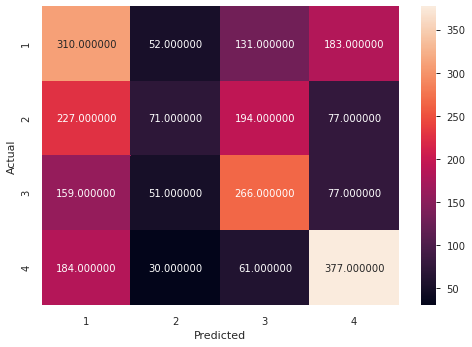

In [14]:
#Creating a Logistic Regression model and checking its Metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

#Trying different polynomial degrees
degrees = [1, 2, 3, 4, 5, 6, 7]
print("Testing degrees:")
for a in degrees:
    poly = PolynomialFeatures(degree=a)
    X_train_degree = poly.fit_transform(X_train)
    X_test_degree = poly.fit_transform(X_test)
    model_lr = linear_model.LogisticRegression(max_iter=100000).fit(X_train_degree, y_train)
    y_preds_train = model_lr.predict(X_train_degree)
    y_preds_test = model_lr.predict(X_test_degree)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best polynomial degree
chosen_degree = 4
poly = PolynomialFeatures(degree=chosen_degree)

#Working on X_train & X_test in the polynomial chosen degree
X_train_degree = poly.fit_transform(X_train)
X_test_degree = poly.fit_transform(X_test)

#Fitting to the model
model_lr = linear_model.LogisticRegression().fit(X_train_degree, y_train)
print(f"Linear Regression Intercept: {model_lr.intercept_}")
print(f"Linear Regression Coefficients: {model_lr.coef_}, \n")

#Getting the predictions & Metrics
y_preds_train = model_lr.predict(X_train_degree)
y_preds_test = model_lr.predict(X_test_degree)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen degree:")
print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
X_degree = poly.fit_transform(X)
y_preds_all = model_lr.predict(X_degree)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_lr.xlsx")

# 9.2 Logistic Regression CV

In [15]:
# #Creating a Logistic Regression CV model and checking its Metrics

# #Trying different polynomial degrees
# degrees = [1, 2, 3, 4, 5, 6, 7]
# print("Testing degrees:")
# for a in degrees:
#     poly = PolynomialFeatures(degree=a)
#     X_train_degree = poly.fit_transform(X_train)
#     X_test_degree = poly.fit_transform(X_test)
#     model_lr_cv = linear_model.LogisticRegressionCV(max_iter=100000).fit(X_train_degree, y_train)
#     y_preds_train = model_lr_cv.predict(X_train_degree)
#     y_preds_test = model_lr_cv.predict(X_test_degree)
#     accuracy_train = accuracy_score(y_train, y_preds_train)
#     accuracy_test = accuracy_score(y_test, y_preds_test)
#     precision_train = precision_score(y_train, y_preds_train, average="weighted")
#     precision_test = precision_score(y_test, y_preds_test, average="weighted")
#     recall_train = recall_score(y_train, y_preds_train, average="weighted")
#     recall_test = recall_score(y_test, y_preds_test, average="weighted")
#     f1_train = f1_score(y_train, y_preds_train, average="weighted")
#     f1_test = f1_score(y_test, y_preds_test, average="weighted")
#     print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
#     print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
# print("")

# #Choosing the best polynomial degree
# chosen_degree = 4
# poly = PolynomialFeatures(degree=chosen_degree)

# #Working on X_train & X_test in the polynomial chosen degree
# X_train_degree = poly.fit_transform(X_train)
# X_test_degree = poly.fit_transform(X_test)

# #Fitting to the model
# model_lr_cv = linear_model.LogisticRegressionCV().fit(X_train_degree, y_train)
# print(f"Linear Regression Intercept: {model_lr_cv.intercept_}")
# print(f"Linear Regression Coefficients: {model_lr_cv.coef_}, \n")

# #Getting the predictions & Metrics
# y_preds_train = model_lr_cv.predict(X_train_degree)
# y_preds_test = model_lr_cv.predict(X_test_degree)
# accuracy_train = accuracy_score(y_train, y_preds_train)
# accuracy_test = accuracy_score(y_test, y_preds_test)
# precision_train = precision_score(y_train, y_preds_train, average="weighted")
# precision_test = precision_score(y_test, y_preds_test, average="weighted")
# recall_train = recall_score(y_train, y_preds_train, average="weighted")
# recall_test = recall_score(y_test, y_preds_test, average="weighted")
# f1_train = f1_score(y_train, y_preds_train, average="weighted")
# f1_test = f1_score(y_test, y_preds_test, average="weighted")
# print("Chosen degree:")
# print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_train, precision_train, recall_train, f1_train))
# print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_test, precision_test, recall_test, f1_test))
# print("\nConfusion matrix:")
# confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
# print(f"{confusion_matrix}, \n")
# sns.heatmap(confusion_matrix, annot=True, fmt='0f')

# #Visualizing y_pred in the dataset
# X_degree = poly.fit_transform(X)
# y_preds_all = model_lr_cv.predict(X_degree)
# auto_ds["Segmentation_Level_predicted"] = y_preds_all
# auto_ds.to_excel("model_lr_cv.xlsx")

# 9.3 SVM

Chosen degree:
Train: Degree:4, Accuracy:0.428, Precision:0.427, Recall:0.428, F1:0.388
Test : Degree:4, Accuracy:0.411, Precision:0.405, Recall:0.411, F1:0.370

Confusion matrix:
Predicted    1   2    3    4
Actual                      
1          343  11  161  161
2          251  16  230   72
3          175   8  293   77
4          205  12   81  354, 



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


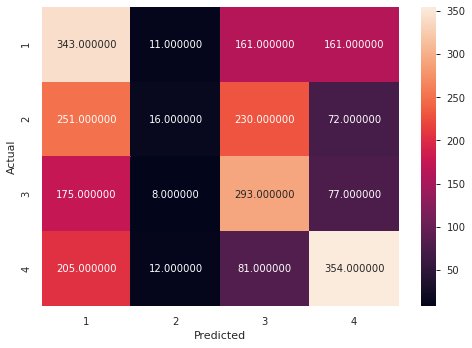

In [16]:
#Creating a SVM model and checking its Metrics
from sklearn import svm

#Fitting to the model
model_svm = svm.SVC().fit(X_train_degree, y_train)

#Getting the predictions & Metrics
y_preds_train = model_svm.predict(X_train_degree)
y_preds_test = model_svm.predict(X_test_degree)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen degree:")
print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_svm.predict(X_degree)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_svm.xlsx")

# 9.4 Naive Bayes

Chosen degree:
Train: Degree:4, Accuracy:0.395, Precision:0.420, Recall:0.395, F1:0.382
Test : Degree:4, Accuracy:0.399, Precision:0.409, Recall:0.399, F1:0.382

Confusion matrix:
Predicted    1   2    3    4
Actual                      
1          413  67  117   79
2          266  67  193   43
3          189  78  237   49
4          289  35   68  260, 



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


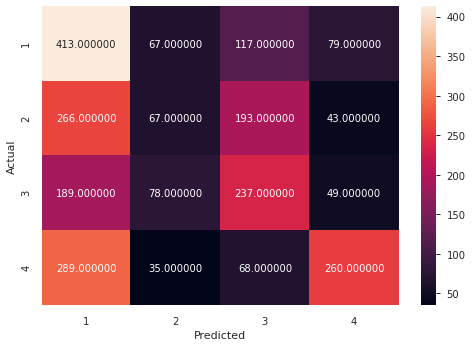

In [17]:
#Creating a Naive Bayes model and checking its Metrics
from sklearn import naive_bayes

#Fitting to the model
model_nb = naive_bayes.MultinomialNB().fit(X_train_degree, y_train)

#Getting the predictions & Metrics
y_preds_train = model_nb.predict(X_train_degree)
y_preds_test = model_nb.predict(X_test_degree)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen degree:")
print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_nb.predict(X_degree)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_nb.xlsx")

# 9.5 KNN

Testing neighbors:
Train: Neighbors:1, Accuracy:0.630, Precision:0.630, Recall:0.630, F1:0.630
Test : Neighbors:1, Accuracy:0.327, Precision:0.325, Recall:0.327, F1:0.325
Train: Neighbors:2, Accuracy:0.543, Precision:0.614, Recall:0.543, F1:0.529
Test : Neighbors:2, Accuracy:0.324, Precision:0.351, Recall:0.324, F1:0.316
Train: Neighbors:3, Accuracy:0.549, Precision:0.584, Recall:0.549, F1:0.549
Test : Neighbors:3, Accuracy:0.349, Precision:0.358, Recall:0.349, F1:0.343
Train: Neighbors:4, Accuracy:0.550, Precision:0.562, Recall:0.550, F1:0.550
Test : Neighbors:4, Accuracy:0.362, Precision:0.365, Recall:0.362, F1:0.360
Train: Neighbors:5, Accuracy:0.539, Precision:0.550, Recall:0.539, F1:0.539
Test : Neighbors:5, Accuracy:0.357, Precision:0.364, Recall:0.357, F1:0.357
Train: Neighbors:6, Accuracy:0.532, Precision:0.545, Recall:0.532, F1:0.532
Test : Neighbors:6, Accuracy:0.371, Precision:0.379, Recall:0.371, F1:0.369
Train: Neighbors:7, Accuracy:0.524, Precision:0.532, Recall:0.524, F1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


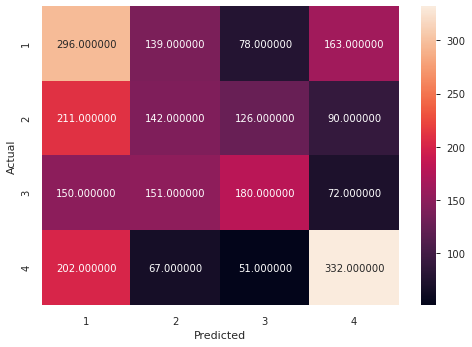

In [18]:
#Creating a KNN model and checking its Metrics
from sklearn import neighbors

#Trying different neighbors
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
print("Testing neighbors:")
for a in n_neighbors:
    model_knn = neighbors.KNeighborsClassifier(n_neighbors=a).fit(X_train_degree, y_train)
    y_preds_train = model_knn.predict(X_train_degree)
    y_preds_test = model_knn.predict(X_test_degree)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best neighbor
chosen_neighbor = 10
model_knn = neighbors.KNeighborsClassifier(n_neighbors=chosen_neighbor).fit(X_train_degree, y_train)
y_preds_train = model_knn.predict(X_train_degree)
y_preds_test = model_knn.predict(X_test_degree)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen neighbors:")
print("Train: Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_neighbor, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_neighbor, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_knn.predict(X_degree)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_knn.xlsx")

# 9.6 Random Forest

Testing depths:
Train: Depth:1, Accuracy:0.485, Precision:0.490, Recall:0.485, F1:0.465
Test : Depth:1, Accuracy:0.414, Precision:0.397, Recall:0.414, F1:0.391
Train: Depth:2, Accuracy:0.485, Precision:0.490, Recall:0.485, F1:0.465
Test : Depth:2, Accuracy:0.414, Precision:0.397, Recall:0.414, F1:0.391
Train: Depth:3, Accuracy:0.485, Precision:0.490, Recall:0.485, F1:0.465
Test : Depth:3, Accuracy:0.414, Precision:0.397, Recall:0.414, F1:0.391
Train: Depth:4, Accuracy:0.485, Precision:0.490, Recall:0.485, F1:0.465
Test : Depth:4, Accuracy:0.414, Precision:0.397, Recall:0.414, F1:0.391
Train: Depth:5, Accuracy:0.485, Precision:0.490, Recall:0.485, F1:0.465
Test : Depth:5, Accuracy:0.414, Precision:0.397, Recall:0.414, F1:0.391
Train: Depth:6, Accuracy:0.485, Precision:0.490, Recall:0.485, F1:0.465
Test : Depth:6, Accuracy:0.414, Precision:0.397, Recall:0.414, F1:0.391
Train: Depth:7, Accuracy:0.485, Precision:0.490, Recall:0.485, F1:0.465
Test : Depth:7, Accuracy:0.414, Precision:0.397,

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


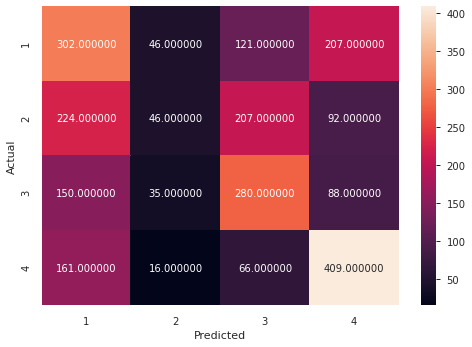

In [19]:
#Creating a Random Forest model and checking its Metrics
from sklearn import ensemble

#Trying different depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_rf = ensemble.RandomForestClassifier(max_depth=7, random_state=0).fit(X_train_degree, y_train)
    y_preds_train = model_rf.predict(X_train_degree)
    y_preds_test = model_rf.predict(X_test_degree)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best depth
chosen_depth = 5
model_rf = ensemble.RandomForestClassifier(max_depth=chosen_depth, random_state=0).fit(X_train_degree, y_train)
y_preds_train = model_rf.predict(X_train_degree)
y_preds_test = model_rf.predict(X_test_degree)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen neighbors:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_rf.predict(X_degree)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_rf.xlsx")

# 9.7 XGBoost

Testing depths:
Train: Depth:1, Accuracy:0.452, Precision:0.445, Recall:0.452, F1:0.435
Test : Depth:1, Accuracy:0.416, Precision:0.401, Recall:0.416, F1:0.397
Train: Depth:2, Accuracy:0.490, Precision:0.490, Recall:0.490, F1:0.482
Test : Depth:2, Accuracy:0.418, Precision:0.408, Recall:0.418, F1:0.407
Train: Depth:3, Accuracy:0.540, Precision:0.541, Recall:0.540, F1:0.536
Test : Depth:3, Accuracy:0.406, Precision:0.394, Recall:0.406, F1:0.396
Train: Depth:4, Accuracy:0.588, Precision:0.588, Recall:0.588, F1:0.585
Test : Depth:4, Accuracy:0.388, Precision:0.377, Recall:0.388, F1:0.380
Train: Depth:5, Accuracy:0.622, Precision:0.622, Recall:0.622, F1:0.620
Test : Depth:5, Accuracy:0.382, Precision:0.373, Recall:0.382, F1:0.376
Train: Depth:6, Accuracy:0.650, Precision:0.650, Recall:0.650, F1:0.648
Test : Depth:6, Accuracy:0.376, Precision:0.369, Recall:0.376, F1:0.370
Train: Depth:7, Accuracy:0.666, Precision:0.666, Recall:0.666, F1:0.664
Test : Depth:7, Accuracy:0.379, Precision:0.372,

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


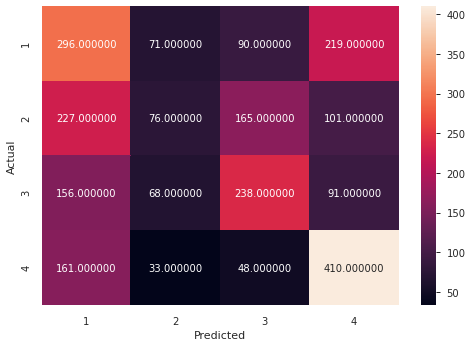

In [20]:
#Creating a XGBoost model and checking its Metrics
from xgboost import XGBClassifier

#Trying different depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_xgbc = XGBClassifier(max_depth=a, objective="multi:softmax", num_class=4, random_state=0).fit(X_train_degree, y_train)
    y_preds_train = model_xgbc.predict(X_train_degree)
    y_preds_test = model_xgbc.predict(X_test_degree)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best depth
chosen_depth = 1
model_xgbc = XGBClassifier(max_depth=chosen_depth, objective="multi:softmax", num_class=4, random_state=0).fit(X_train_degree, y_train)
y_preds_train = model_xgbc.predict(X_train_degree)
y_preds_test = model_xgbc.predict(X_test_degree)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen neighbors:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_xgbc.predict(X_degree)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_xgbc.xlsx")

# 9.8 Deep Learning

Epoch 1/10
230/230 [==============================] - 0s 987us/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 2/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3/10
230/230 [==============================] - 0s 978us/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 5/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 6/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 7/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 8/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 9/10
230/230 [==============================] - 0s 1ms/step - 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train: Accuracy:0.268, Precision:0.072, Recall:0.268, F1:0.113
Test : Accuracy:0.276, Precision:0.076, Recall:0.276, F1:0.119

Confusion matrix:
[[676   0   0   0]
 [569   0   0   0]
 [553   0   0   0]
 [652   0   0   0]], 



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


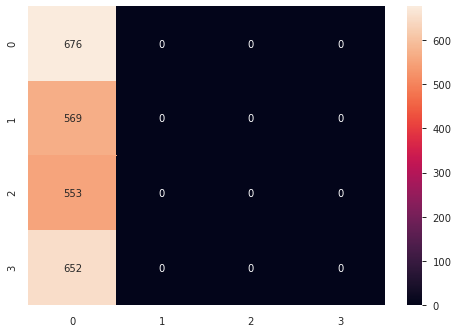

In [21]:
#Creating a Deep Learning model and checking its Metrics
from keras import Sequential
from keras.layers import Dense

#Creating a model
model_dl = Sequential()

#Input and First Hidden Layer
model_dl.add(Dense(units=256, activation="relu", input_dim=X_train.shape[-1]))

#Output Layer
model_dl.add(Dense(units=1, activation="softmax",))

#Compiling the neural network
model_dl.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

#Fitting to the model
model_dl.fit(X_train, y_train, epochs=10)

#Getting the predictions & Metrics
y_preds_train = model_dl.predict(X_train)
y_preds_test = model_dl.predict(X_test)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_train, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_preds_test)
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='.0f')

#Visualizing y_pred in the dataset
y_preds_all = model_dl.predict(X)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_dl.xlsx")

# 10. Model Deployment

In [22]:
#We´re choosing the model that presents the best metrics (XGBoost)
Age_input = int(input("Enter the Age: "))

Family_Size_input = int(input("Enter the Family Size: "))

Work_Experience_input = int(input("Enter the Work Experience: "))

Profession_Healthcare_input = str(input("Is your profession Healthcare (Yes/No)? "))
if Profession_Healthcare_input == "Yes":
    Profession_Healthcare_input = int(1)
else:
    Profession_Healthcare_input = int(0)

Spending_Score_Level_input = str(input("Enter the Spending Score Level (Low/Average/High): "))
if Spending_Score_Level_input == "Low":
    Spending_Score_Level_input = int(1)
if Spending_Score_Level_input == "Average":
    Spending_Score_Level_input = int(2)
else:
    Spending_Score_Level_input = int(3)

Work_Experience_to_Age_Ratio_input = Work_Experience_input/Age_input


X_inputs_df = pd.DataFrame([Age_input, Work_Experience_to_Age_Ratio_input, Family_Size_input, Work_Experience_input, Profession_Healthcare_input, Spending_Score_Level_input]).T
X_inputs_degree = poly.fit_transform(X_inputs_df)
    
print(f"Predicted Segmentation = {model_xgbc.predict(X_inputs_degree)}")

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

# 11. Conclusions

In this project we went through all the process from defining the business objective, collecting data, exploring features and distributions, treating data,  understanding correlations, selecting relevant features, data modelling and presenting 8 different algorithms with metrics to select the best to predict the Customer Segmentation, what will help the business adopt the best marketing strategies to each of them and bring more revenue to the company. The chosen model was XGBoost, although it has limitations and doesn’t present a high accuracy. We could reach a little higher accuracy having a more powerful server that would allow us consider more feaures in the model, but we can assume we don´t have sufficient quality data to build a robust model, we´d have to go deeper in the organization with the business and the data engineer in order to explore if more relevant features are available.